In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [12]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [14]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
y = train["label"]
X = train.drop(["label"],axis = 1)

In [15]:
li_idxs = []
for i in range(10):
    for nr in range(10):
        ix = y[y==nr].index[i]
        li_idxs.append(ix) 

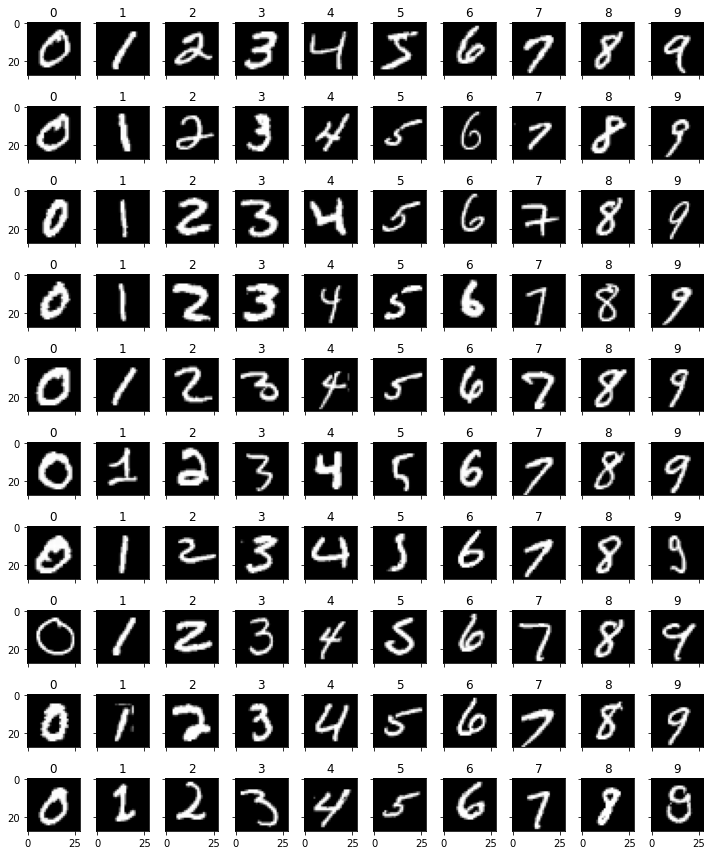

In [16]:
fig, axs = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(10,12))
axs = axs.flatten()
for n, i in enumerate(li_idxs):
    im = X.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[n].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[n].set_title(y[i])
plt.tight_layout() 

In [ ]:
#Lee el corpus original del archivo de entrada y lo pasa a una DataFrame
print ('Cargando datos...')
df = pd.read_csv('mnist_train.csv', sep=',', engine='python')
X = df.drop(['label'],axis=1).values   
y = df['label'].values

In [ ]:
#Separa el corpus cargado en el DataFrame en el 70% para entrenamiento y el 30% para pruebas
print ('Separando los conjuntos de datos...')
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(40), max_iter=10, random_state = 0)

In [ ]:
print ('Entrenando red neuronal ...')
clf.fit(X_train, y_train)

In [ ]:
print ('Predicción de la red neuronal')
y_pred = clf.predict(X_test)

In [ ]:
print (classification_report(y_test, y_pred))
print("Training set score: %f" % clf.score(X_train, y_train))

In [ ]:
for i in range(10):
    img = X_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.title('Real: ' + str(y_test[i]) + ' Predicted: ' + str(y_pred[i]), fontsize = 20);
    plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
clf_Perceptron = Perceptron(random_state=0)
param_grid = { 'penalty': ['l1','l2'], 'tol': [0.05, 0.1] }
GridCV_Perceptron = GridSearchCV(clf_Perceptron, param_grid, verbose=1, cv=5)
GridCV_Perceptron.fit(X_train,y_train)
score_grid_Perceptron = get_best_score(GridCV_Perceptron)